In [ ]:
#!pip install --user networkx==2.4
#!pip install --user matplotlib==3.4.1

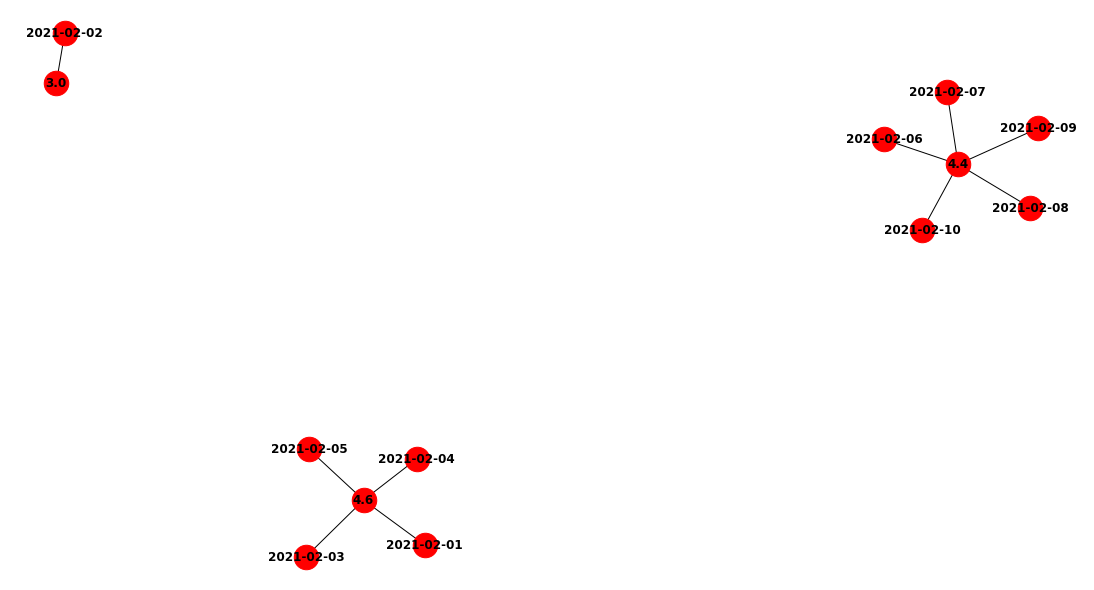

In [1]:
# Biblioteca para manipulação de dados
import pandas as pd
# Biblioteca para criação de graficos 
import matplotlib.pyplot as plt
# Importa biblioteca para criar o grafo
import networkx as nx
# Lendo os dados
df = pd.read_csv('C:\\Users\\lucas\\Downloads\\dataset.csv', encoding='utf-8')
# Renomeando as colunas
df.columns = ['data','top_100_mais_vendidos','nome_produto','nota_clientes','numero_comentario_cliente','preco_produto']
# Pegando os top 5 clientes dos 10 primeiros dias do mês 2
df_top5 = df[['data','nota_clientes']].loc[df['top_100_mais_vendidos'] < 6].head(50)
# Pegando as menores notas de clientes
df_top5 = df_top5.groupby(['data']).min()
# Resetando índice 
df_top5 = df_top5.reset_index()
# Criando objeto do tipo Graph
G = nx.Graph()
# Adicionando as datas nas arestas e as menores notas dos clientes nos nós do Grafo
for n in range(0,df_top5.shape[0]):
    G.add_edge(df_top5['data'].iloc[n], df_top5['nota_clientes'].iloc[n])
# Mostrando o Grafo 
plt.figure(figsize = (15,8))
nx.draw(G, with_labels=True, node_color='red', font_weight='bold',node_size = 600)

In [2]:
df.head()

,data,top_100_mais_vendidos,nome_produto,nota_clientes,numero_comentario_cliente,preco_produto
0,2021-02-01,1,Fire TV Stick 4K streaming device with Alexa V...,4.7,"512,797",$39.99
1,2021-02-01,2,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,"328,652",$24.99
2,2021-02-01,3,Echo Show 5 -- Smart display with Alexa – stay...,4.6,"298,030",$44.99
3,2021-02-01,4,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,"138,241",$44.99
4,2021-02-01,5,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,"62,702",$39.00
